<a href="https://colab.research.google.com/github/troncosofranco/Time-Series-Forecasting/blob/main/Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset

The dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/manjeetsingh/retaildataset?select=sales+data-set.csv). The dataset represents the sale of retail store.

#1. Import modules

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

#2. Load data

In [2]:
df = pd.read_csv('sales_dataset.csv')
df.shape

(1000, 17)

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df['Date']= df['Date'] + ' ' + df['Time']
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019 13:08,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019 10:29,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019 13:23,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019 20:33,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019 10:37,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df = df.sort_values(by='Date',ascending=True)

Plot timeseries

In [6]:
fig = px.line(df, x='Date', y='gross income', title='Single Product Demand', width=800, height=400)
fig.update_traces(line_color='#4169E1')
fig.show()


- There is a significant amount of variability within the data.
- The sales remain approximatly constant over time.
- There seems to be an element of seasonality.

Deconstruct the time series aspect. Use the to_datetime() function to convert string into the date type.

In [7]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
df_gross = df[['Date', 'Time', 'gross income']]

In [9]:
def get_features(dataframe):
    dataframe['gross income'] = dataframe['gross income']
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataframe['year'] = dataframe.Date.dt.year
    dataframe['month'] = dataframe.Date.dt.month
    dataframe['day'] = dataframe.Date.dt.day
    dataframe['dayofyear'] = dataframe.Date.dt.dayofyear
    dataframe['dayofweek'] = dataframe.Date.dt.dayofweek
    dataframe['weekofyear'] = dataframe.Date.dt.weekofyear
    return dataframe

In [10]:
df_gross = get_features(df_gross)
df_gross.head()

<ipython-input-9-7750b4c0ff36>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-9-7750b4c0ff36>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-9-7750b4c0ff36>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-9-7750b4c0ff3

,Date,Time,gross income,year,month,day,dayofyear,dayofweek,weekofyear
17,2019-01-01 10:39:00,10:39,21.783,2019,1,1,1,1,1
970,2019-01-01 11:36:00,11:36,42.315,2019,1,1,1,1,1
839,2019-01-01 11:40:00,11:40,8.766,2019,1,1,1,1,1
523,2019-01-01 11:43:00,11:43,6.287,2019,1,1,1,1,1
567,2019-01-01 13:55:00,13:55,29.583,2019,1,1,1,1,1


Plot the data by month.

Text(0, 0.5, 'Gross Income')

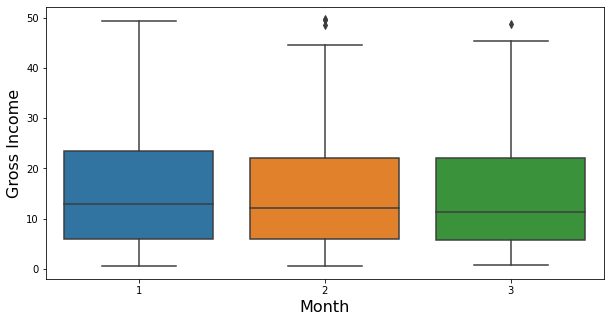

In [11]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='month', y='gross income', data=df_gross)
ax.set_xlabel('Month', fontsize = 16)
ax.set_ylabel('Gross Income', fontsize = 16)


Plot the data by day.

Text(0, 0.5, 'Gross Income')

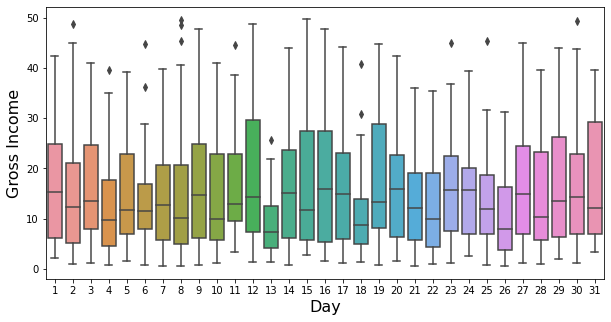

In [12]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='day', y='gross income', data=df_gross)
ax.set_xlabel('Day', fontsize = 16)
ax.set_ylabel('Gross Income', fontsize = 16)

Reduce the noise of data and normalize it using rolling average (moving average). A rolling average (moving average) is a calculation that’s used to smoothen out a noisy dataset by taking the moving mean throughout a particular range. 


In [13]:
#df_gross['Rolling_20'] = df_gross['gross income'].rolling(window=20).mean()
#df_gross['Rolling_100'] = df_gross['gross income'].rolling(window=100).mean()

Plot the original raw data and the two rolling averages onto a single plot.

In [14]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=df_gross['Date'], y=df_gross['gross income'], mode='lines', name='Raw Data', line=dict(color= '#bec2ed')))
# fig.add_trace(go.Scatter(x=df_gross['Date'], y=df_gross['Rolling_20'], mode='lines', name='Rolling_20', line=dict(color='#858eed', dash='dash')))
# fig.add_trace(go.Scatter(x=df_gross['Date'], y=df_gross['Rolling_100'], mode='lines', name='Rolling_100', line=dict(color='#d99543')))
# fig.update_layout(width=800, height=500)


#3. Explore the components of the time series

Time series datasets generally consist of four main components: level, long-term trends, seasonality, and irregular noise, which we can break down into a method known as time series decomposition. Series components can be either additive or multiplicative:

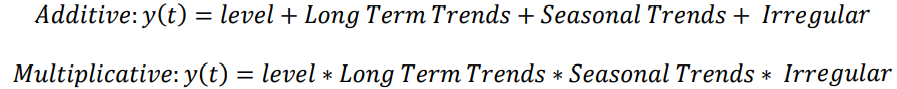

- **Level:** Average values of a dataset over time
- **Long-term Trends:** General direction of the data showing an increase or decrease
- **Seasonal Trends:** Short-term repetitive nature (days, weeks, months)
- **Irregular Trends:** The noise within the data showing random fluctuations

These compounds are explored using the statsmodels library.

In [15]:
dftmp = pd.DataFrame({'data': df_gross['gross income'].values}, index=df_gross['Date'])
dftmp = dftmp.dropna()
dftmp.head()


,data
Date,
2019-01-01 10:39:00,21.783
2019-01-01 11:36:00,42.315
2019-01-01 11:40:00,8.766
2019-01-01 11:43:00,6.287
2019-01-01 13:55:00,29.583


<Figure size 3600x3600 with 0 Axes>

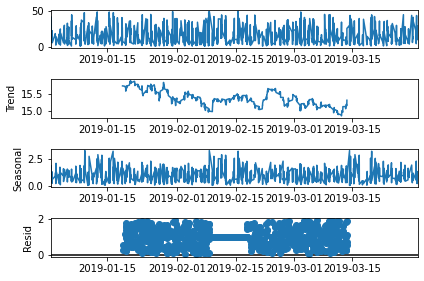

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose


dftmp = dftmp.sort_values(by='Date',ascending=True)
result = seasonal_decompose(dftmp, model='multiplicative', period=365)
plt.figure(figsize=(50,50))
result.plot()
plt.show()

In the first plot, it can be observeed the `gross income` previously calculated. This is then followed by the *long-term* trend, which shows a steady decrease throughout the dataset. The seasonality behind the dataset confirming that `gross income` tend to increase around 15th of each month. Finally, the residual data or noise within the dataset is shown. The noise does not contribute to the other main categories.


#4. Model 
##4.1. Prophet
One of the greatest benefits behind Prophet is also one of 
its consequences – its high-level nature of abstraction, allowing users to make a forecast  with only a few lines of code. This limited variability can be a great way to make a quick  forecast but can hinder the model development process.



Reshape the DataFrame to integrate it with the Prophet
library. The library expects the DataFrame to contain two columns: ds and y. ds represents the date stamp and y is the value. 

In [17]:
df_prophet = df[['Date', 'gross income']]
df_prophet = df_prophet.dropna()
df_prophet.columns = ['ds', 'y']

 Create an instance of the Prophet model and fit that to our dataset.

In [18]:
from prophet import Prophet
m = Prophet()
m.fit(df_prophet)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp58g9hm6_/hk86g02k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp58g9hm6_/yhoohl2i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12896', 'data', 'file=/tmp/tmp58g9hm6_/hk86g02k.json', 'init=/tmp/tmp58g9hm6_/yhoohl2i.json', 'output', 'file=/tmp/tmp58g9hm6_/prophet_model3x9trrj_/prophet_model-20221205194507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:45:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:45:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Call the make_future_dataframe() function and the number of pperiods of interest

In [19]:
future = m.make_future_dataframe(periods=30*1)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1019,2019-04-25 20:37:00,14.996916,0.313486,29.776314
1020,2019-04-26 20:37:00,14.513829,-0.401470,29.816296
1021,2019-04-27 20:37:00,16.347602,1.616563,30.937785
1022,2019-04-28 20:37:00,14.859098,0.080196,30.427171
1023,2019-04-29 20:37:00,13.772233,-0.836560,29.475330


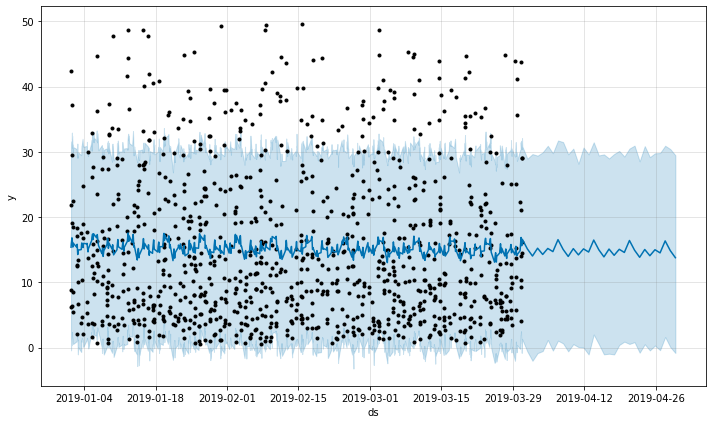

In [20]:
fig1 = m.plot(forecast)

## 4.2. LSTM for time series modeling

Use MinMaxScaler from the sklearn library to scale the dataset

In [21]:
from sklearn.preprocessing import MinMaxScaler
ds = df[['gross income']].values
scaler = MinMaxScaler(feature_range=(0, 1))
ds = scaler.fit_transform(ds)

Split the data into our training and testing sets.

In [22]:
train_size = int(len(ds) * 0.75)
test_size = len(ds) - train_size
train = ds[0: train_size,:]
test = ds[train_size : len(ds), :]


Considering the time series data, it is required to lookback to train the model in iterations. Lookback value as the range of how far back in the data the model should look to train.

In [24]:
def dataset_generator(df, lookback=0):
    df_x = []
    df_y = []
    
    for i in range(len(df) - lookback - 1):
        tmp = df[i:(i+lookback), 0]
        df_x.append(tmp)
        df_y.append(df[i + lookback, 0])
        
    return np.array(df_x), np.array(df_y)

In [26]:
import numpy as np
lookback = 100
X_train, y_train = dataset_generator(train, lookback)
X_test, y_test = dataset_generator(test, lookback)

 Reshape data prior to using the data as input

In [27]:

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

Neural Network architecture:
1. Sequential class from Keras
2. LSTM layer with 3 nodes 
3. Dense layer with a single output value

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow as tf

model = Sequential()
model.add(LSTM(2, input_shape=(1, lookback)))
model.add(Dense(1))
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt)
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2)                 824       
                                                                 
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 827
Trainable params: 827
Non-trainable params: 0
_________________________________________________________________


 fit() function to fit the model on the training dataset for 100 epochs.

In [51]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
649/649 - 3s - loss: 0.0621 - 3s/epoch - 4ms/step
Epoch 2/100
649/649 - 1s - loss: 0.0545 - 1s/epoch - 2ms/step
Epoch 3/100
649/649 - 1s - loss: 0.0534 - 1s/epoch - 2ms/step
Epoch 4/100
649/649 - 1s - loss: 0.0521 - 1s/epoch - 2ms/step
Epoch 5/100
649/649 - 1s - loss: 0.0507 - 1s/epoch - 2ms/step
Epoch 6/100
649/649 - 1s - loss: 0.0501 - 1s/epoch - 2ms/step
Epoch 7/100
649/649 - 1s - loss: 0.0491 - 1s/epoch - 2ms/step
Epoch 8/100
649/649 - 1s - loss: 0.0492 - 1s/epoch - 2ms/step
Epoch 9/100
649/649 - 1s - loss: 0.0485 - 1s/epoch - 2ms/step
Epoch 10/100
649/649 - 1s - loss: 0.0474 - 1s/epoch - 2ms/step
Epoch 11/100
649/649 - 1s - loss: 0.0475 - 1s/epoch - 2ms/step
Epoch 12/100
649/649 - 1s - loss: 0.0462 - 1s/epoch - 2ms/step
Epoch 13/100
649/649 - 1s - loss: 0.0465 - 1s/epoch - 2ms/step
Epoch 14/100
649/649 - 1s - loss: 0.0460 - 1s/epoch - 2ms/step
Epoch 15/100
649/649 - 1s - loss: 0.0455 - 1s/epoch - 2ms/step
Epoch 16/100
649/649 - 1s - loss: 0.0450 - 1s/epoch - 2ms/step
E

Text(0, 0.5, 'Mean Squared Error')

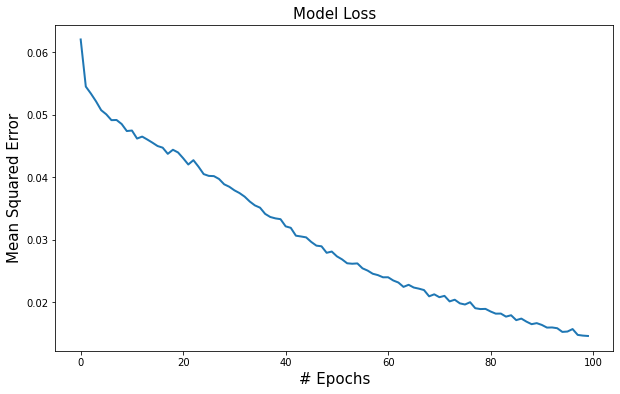

In [52]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], linewidth=2)
plt.title('Model Loss', fontsize=15)
plt.xlabel('# Epochs', fontsize=15)
plt.ylabel('Mean Squared Error', fontsize=15)


Forecast the values of interest.

In [53]:
X_train_forecast = scaler.inverse_transform(model.predict(X_train))
y_train = scaler.inverse_transform([y_train.ravel()])

X_test_forecast = scaler.inverse_transform(model.predict(X_test))
y_test = scaler.inverse_transform([y_test.ravel()])

5/5 [==============================] - 0s 9ms/step


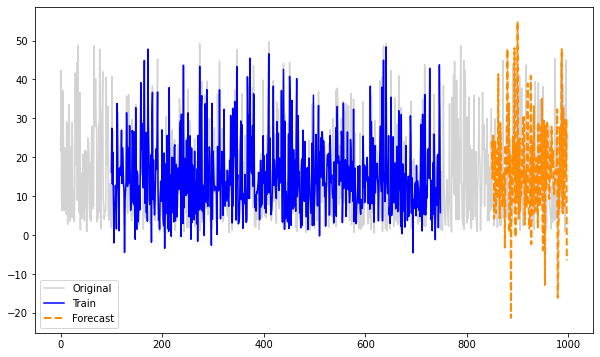

In [54]:
plt.figure(figsize=(10,6))

# Plot original dataset:
plt.plot(list(range(0, len(ds))), scaler.inverse_transform(ds), label="Original", color="lightgrey")

# Plot training data:
train_y_plot = X_train_forecast
train_x_plot = [i+lookback for i in list(range(0, len(X_train_forecast)))]
plt.plot(train_x_plot, train_y_plot , label="Train", color="blue")

# Plot forecasted data:
test_y_plot = X_test_forecast
test_x_plot = [i+lookback*2 for i in list(range(len(X_train_forecast), len(X_train_forecast)+len(X_test_forecast)))]
plt.plot(test_x_plot, test_y_plot , label="Forecast", color="darkorange", linewidth=2, linestyle="--")

plt.legend()

LSTM model was quite effective in making a forecast using the provided training dataset. The model was not only able to capture the general direction of the values, but also managed to capture the seasonality of the values as well.

Credits:
- [
Machine Learning in Biotechnology and Life Sciences](https://github.com/PacktPublishing/Machine-Learning-in-Biotechnology-and-Life-Sciences/blob/main/chapters/chapter10/chapter10%20-%20LSTM%20Forecasting.ipynb)